In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CONFIG
FOCAL_PAPER = "SKG_MT_90"   # Change to any paper_id
MAX_ENTITIES = 15
MAX_CITATIONS = 5

In [2]:
paper_nodes = pd.read_csv("../outputs/paper_nodes.csv")
entity_nodes = pd.read_csv("../outputs/entity_nodes.csv")
knowledge_edges = pd.read_csv("../outputs/knowledge_edges.csv")
citation_edges = pd.read_csv("../outputs/citation_edges.csv")

# Mapping
id_to_title = dict(zip(paper_nodes["node_id"], paper_nodes["title"]))
id_to_entity = dict(zip(entity_nodes["node_id"], entity_nodes["name"]))

In [3]:
G = nx.DiGraph()

# Add focal paper
G.add_node(FOCAL_PAPER, type="Paper")

In [4]:
## Add citation edges
cited = citation_edges[
    citation_edges["source"] == FOCAL_PAPER
]["target"].unique()[:MAX_CITATIONS]

for target in cited:
    G.add_node(target, type="Paper")
    G.add_edge(FOCAL_PAPER, target, label="cites")


## Add knowledge edges
paper_knowledge = knowledge_edges[
    knowledge_edges["source"] == FOCAL_PAPER
].head(MAX_ENTITIES)

for _, row in paper_knowledge.iterrows():
    entity_id = row["target"]
    predicate = row["predicate"]

    G.add_node(entity_id, type="Entity")
    G.add_edge(FOCAL_PAPER, entity_id, label=predicate)

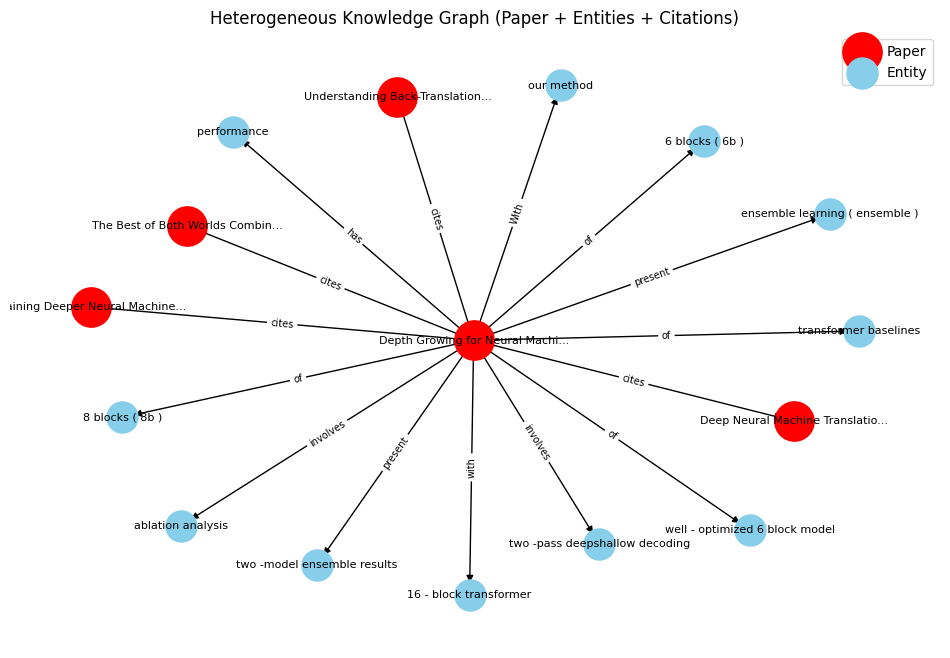

In [7]:
# Layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.8)

# Separate node types
paper_nodes_list = [n for n, d in G.nodes(data=True) if d["type"] == "Paper"]
entity_nodes_list = [n for n, d in G.nodes(data=True) if d["type"] == "Entity"]

nx.draw_networkx_nodes(G, pos,
                       nodelist=paper_nodes_list,
                       node_color="red",
                       node_size=800,
                       label="Paper")

nx.draw_networkx_nodes(G, pos,
                       nodelist=entity_nodes_list,
                       node_color="skyblue",
                       node_size=500,
                       label="Entity")

nx.draw_networkx_edges(G, pos, arrows=True)

# Node labels
labels = {}
for node in G.nodes():
    if node in id_to_title:
        labels[node] = id_to_title[node][:30] + "..."
    elif node in id_to_entity:
        labels[node] = id_to_entity[node]

nx.draw_networkx_labels(G, pos, labels, font_size=8)

# Edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Heterogeneous Knowledge Graph (Paper + Entities + Citations)")
plt.legend()
plt.axis("off")
plt.show()